In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# 1. Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

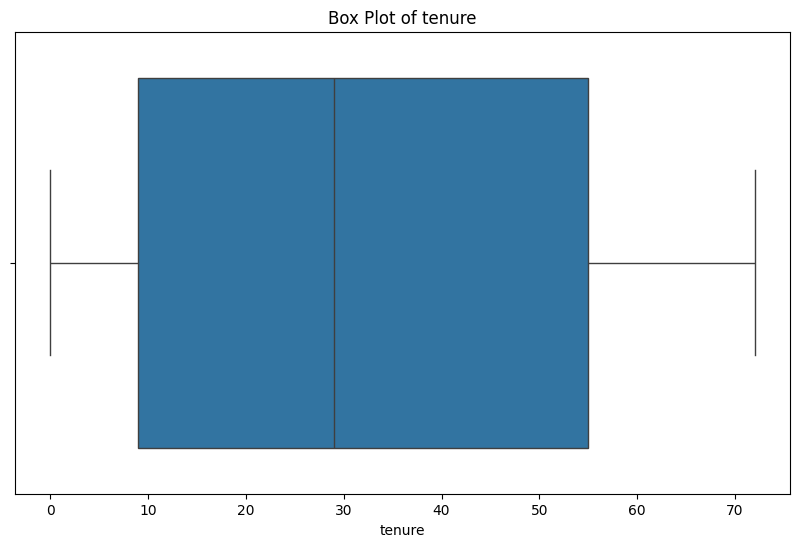

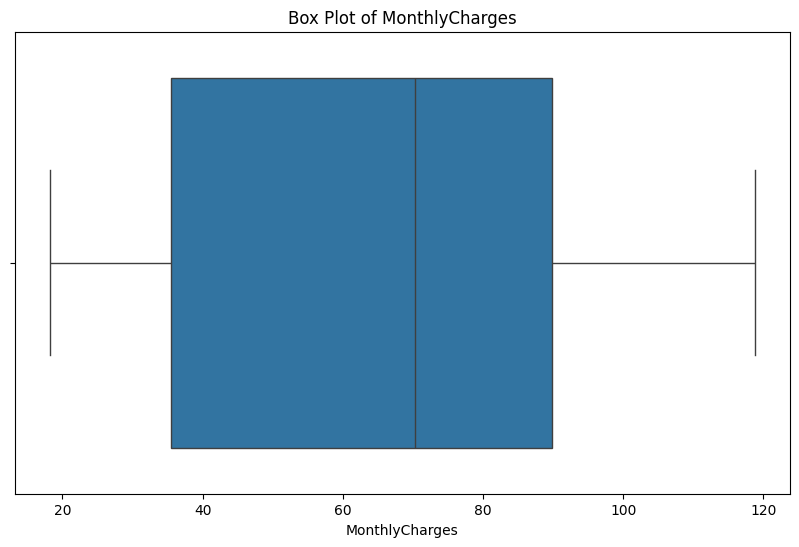

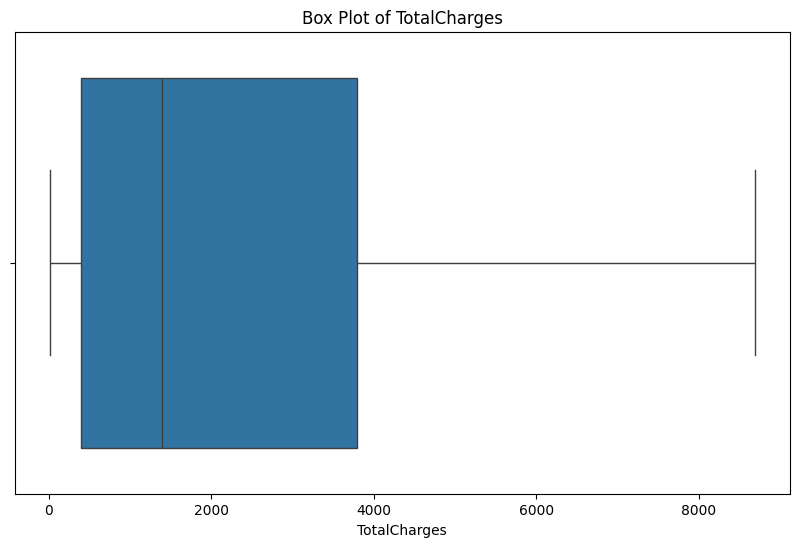

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#drop customerID
df.drop('customerID', axis=1, inplace=True)

In [ ]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


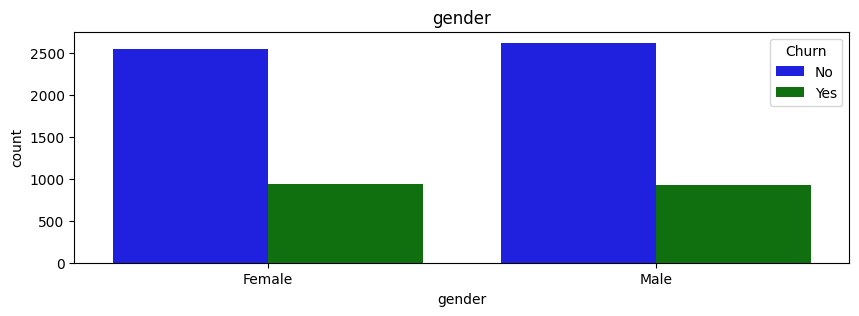

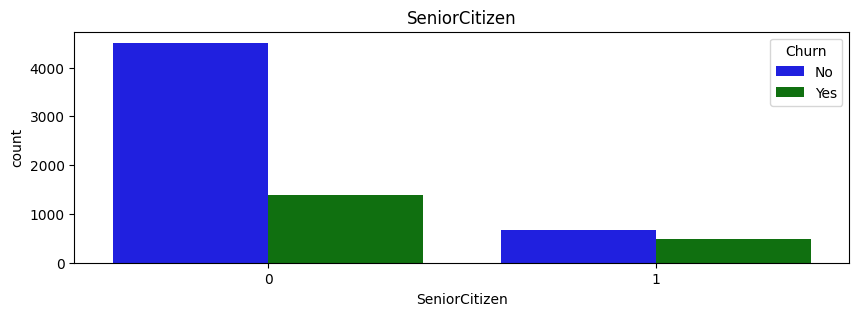

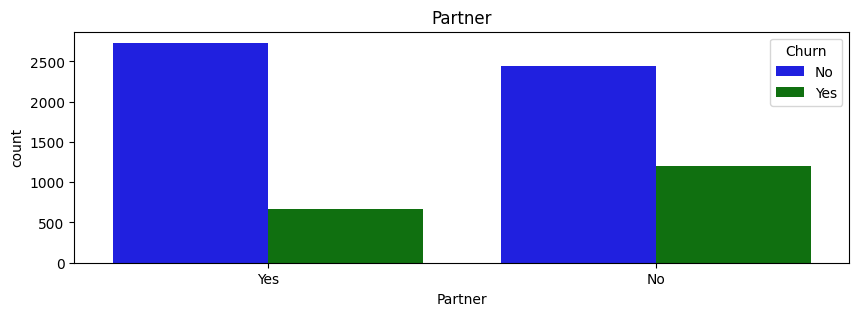

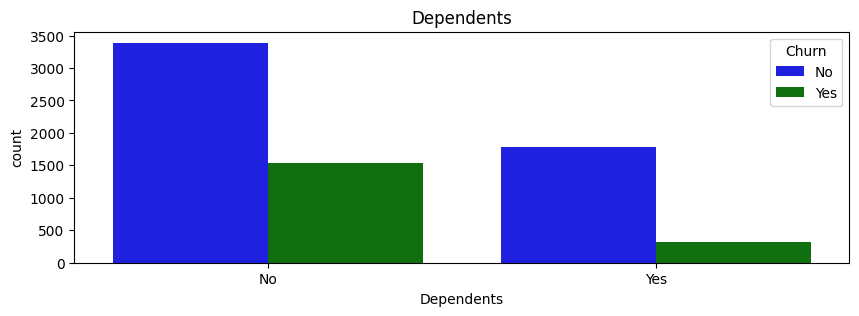

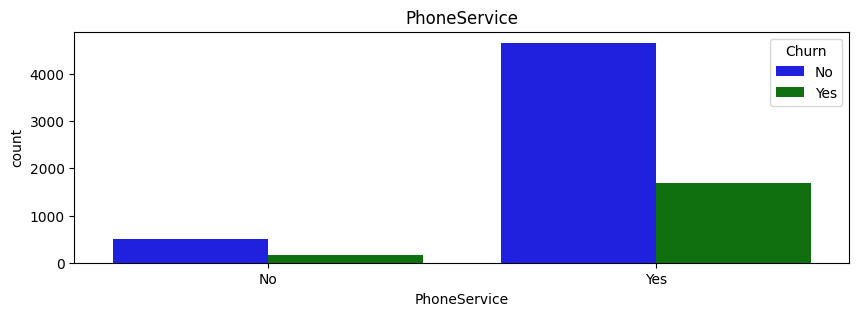

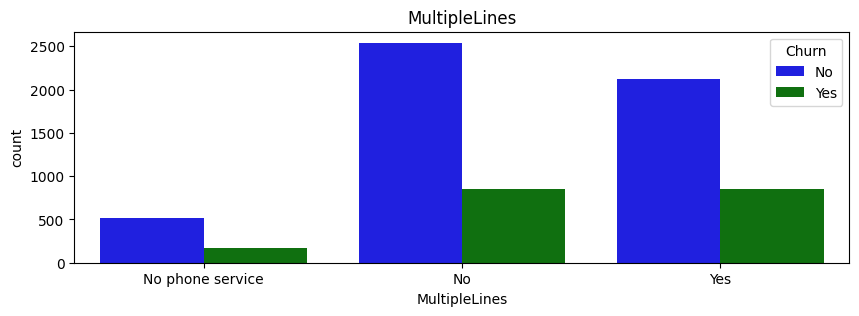

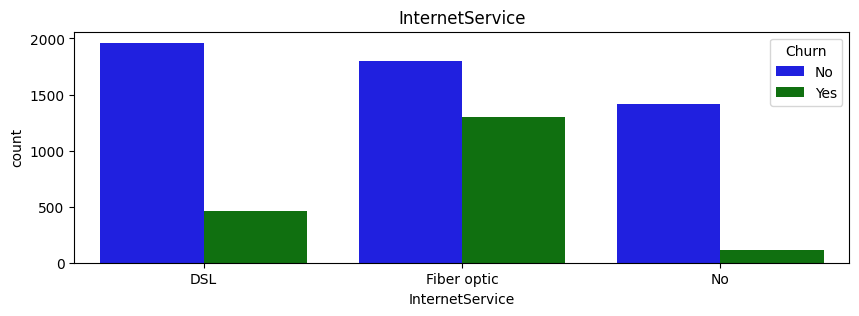

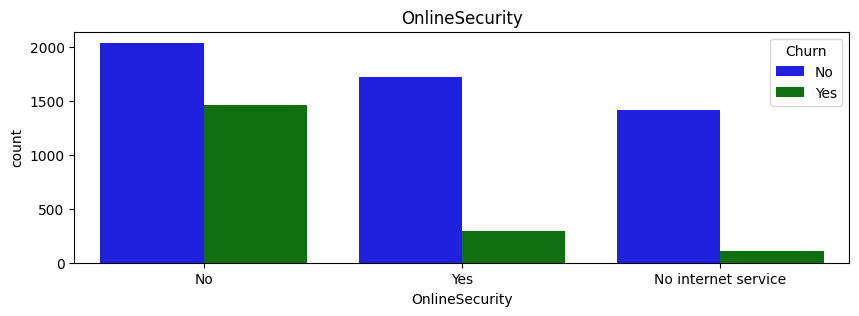

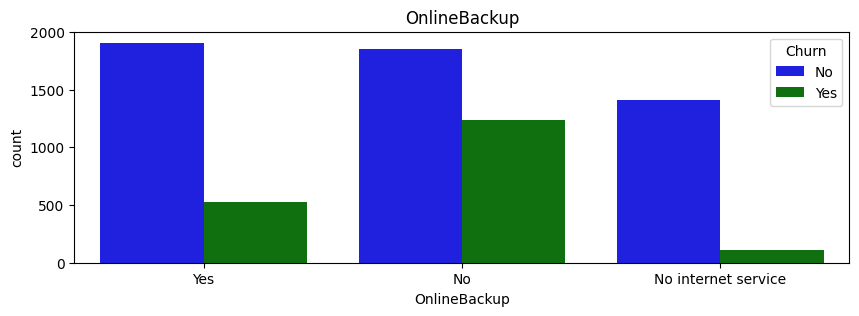

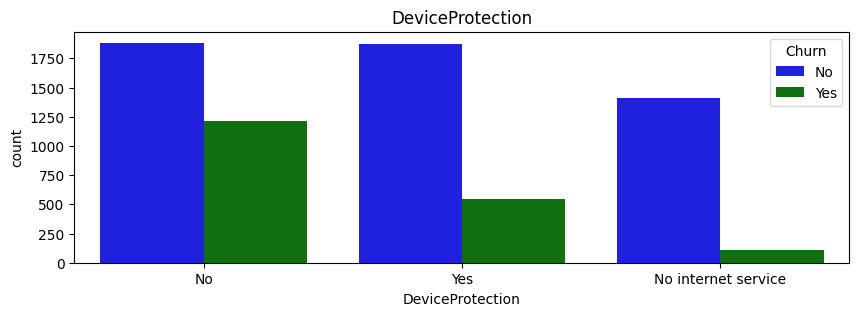

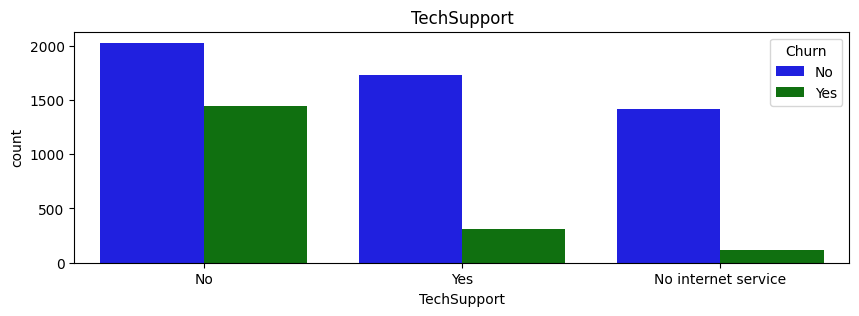

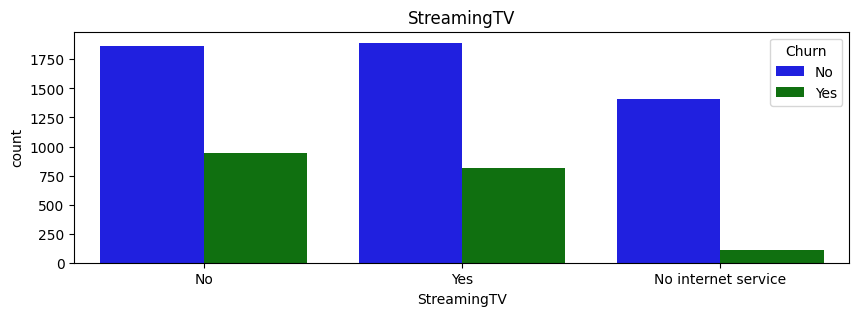

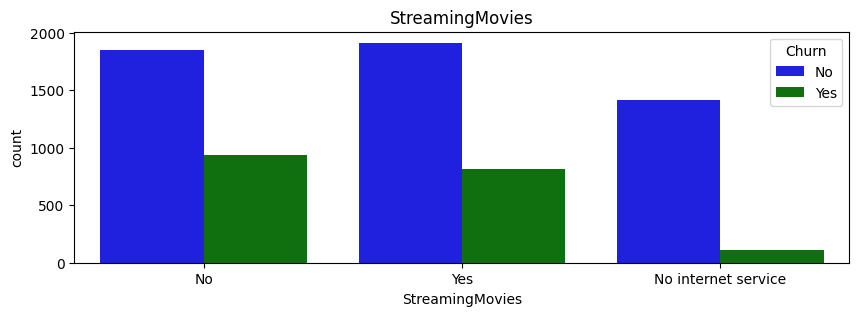

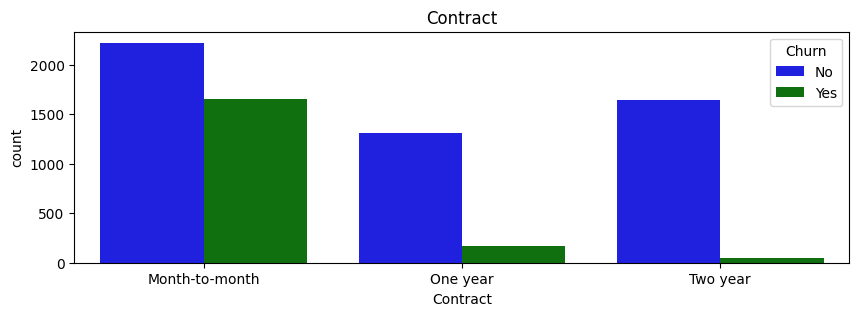

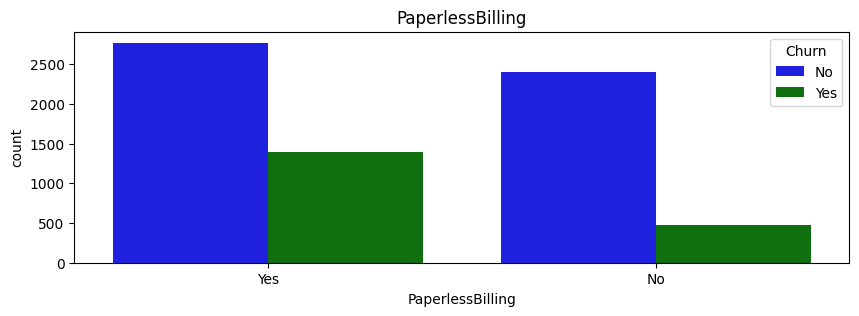

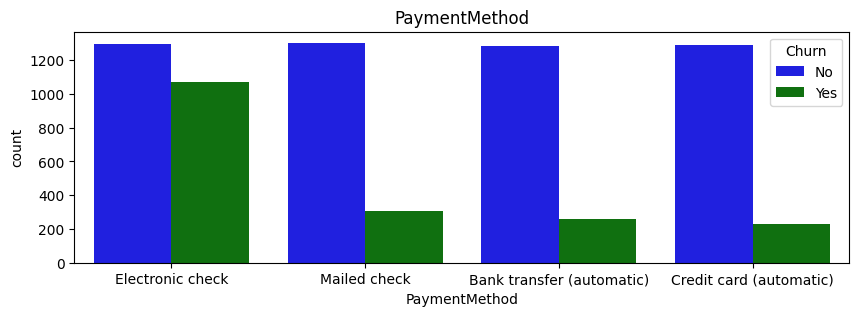

In [ ]:
# Define colors for Yes and No
colors = {'Yes': 'green', 'No': 'blue'}

# Add missing keys for 0 and 1 in the palette
palette = {0: 'blue', 1: 'red'}

for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(10, 3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

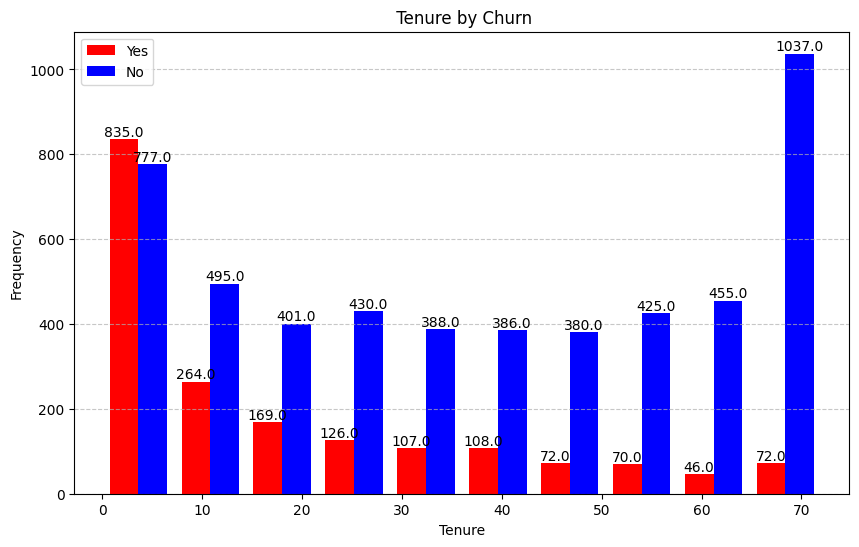

In [ ]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

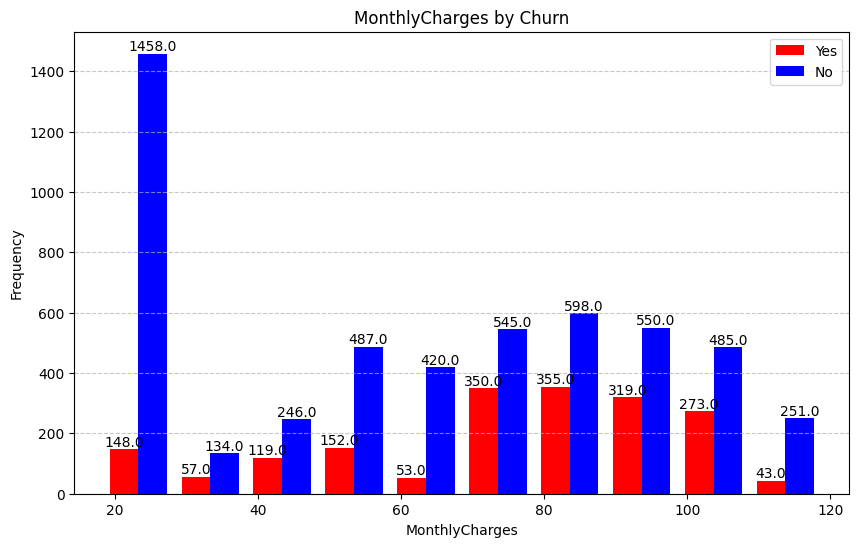

In [ ]:
# make plot for MonthlyCharges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

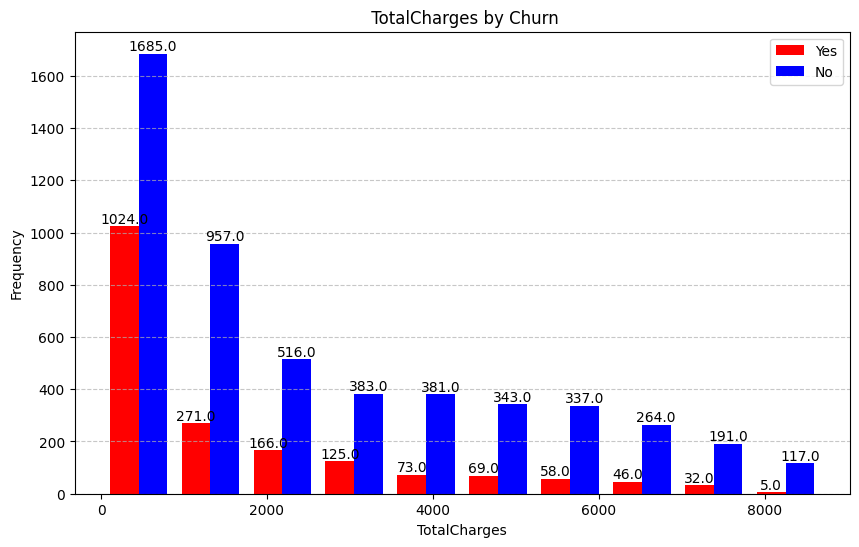

In [ ]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1 : 'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Separate the target variable
y = df['Churn']
X = df.drop('Churn', axis=1)

# Identify columns for one-hot encoding and label encoding
one_hot_cols_multi = [col for col in X.columns if X[col].dtype == 'object' and len(X[col].unique()) > 2 and col != 'Contract']
label_encoding_cols = ['Contract']
one_hot_cols_binary = [col for col in X.columns if X[col].dtype == 'object' and len(X[col].unique()) == 2]

# Perform one-hot encoding for columns with more than 2 unique values (excluding Contract)
X = pd.get_dummies(X, columns=one_hot_cols_multi, drop_first=False)

# Perform label encoding for 'Contract'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Contract'] = le.fit_transform(X['Contract'])

# Perform one-hot encoding for binary columns
X = pd.get_dummies(X, columns=one_hot_cols_binary, drop_first=False)

# Convert boolean columns to numeric (0 or 1)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Binary encode 'Churn'
y = y.map({'No': 0, 'Yes': 1})


# Recombine X and y
df = pd.concat([X, y], axis=1)

display(df.head())

,tenure,Contract,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Churn
0,1,0,29.85,29.85,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
1,34,1,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,2,0,53.85,108.15,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,1
3,45,1,42.30,1840.75,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
4,2,0,70.70,151.65,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Pisahkan fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identifikasi kolom kategorikal & numerik
categorical_cols = X.select_dtypes(include=['category', 'object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# MinMaxScaler untuk numerik
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols, index=X.index)

# Gabungkan hasil encoding + scaling
# Assuming categorical columns are already handled by previous steps and are now numeric
X_processed = pd.concat([scaled_df, X[categorical_cols]], axis=1)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Hyperparameter tuning RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Model terbaik
tuned_rf_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    random_state=42
)

# Latih ulang dengan data train
tuned_rf_model.fit(X_train, y_train)

Best parameters found:  {'max_depth': 10, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


Model Evaluation:
Accuracy: 0.8034066713981547

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[939  97]
 [180 193]]


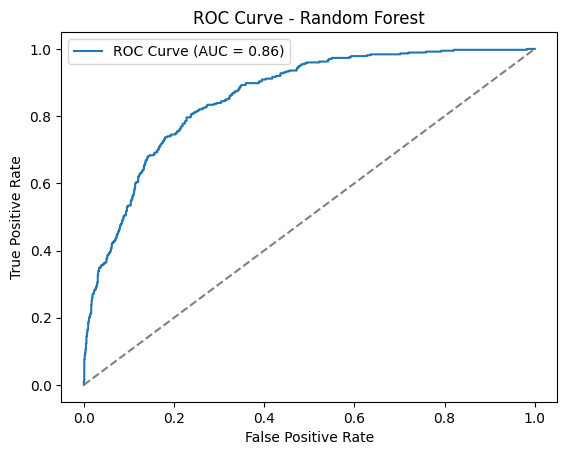

In [ ]:
# Evaluasi model
y_pred = tuned_rf_model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Plot ROC Curve
y_prob = tuned_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()

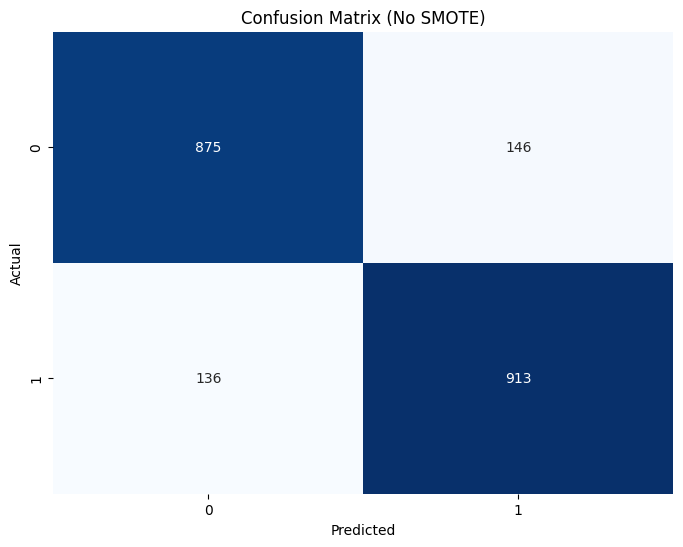

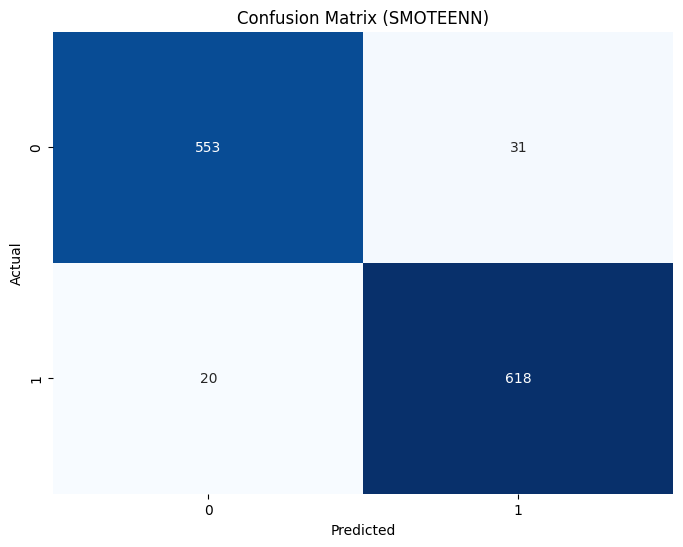

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_no_smote = confusion_matrix(y_test, y_pred) # y_pred is from the first model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_smote, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm_smote = confusion_matrix(y_test_v5, y_pred_v5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SMOTEENN)')
plt.show()

cm

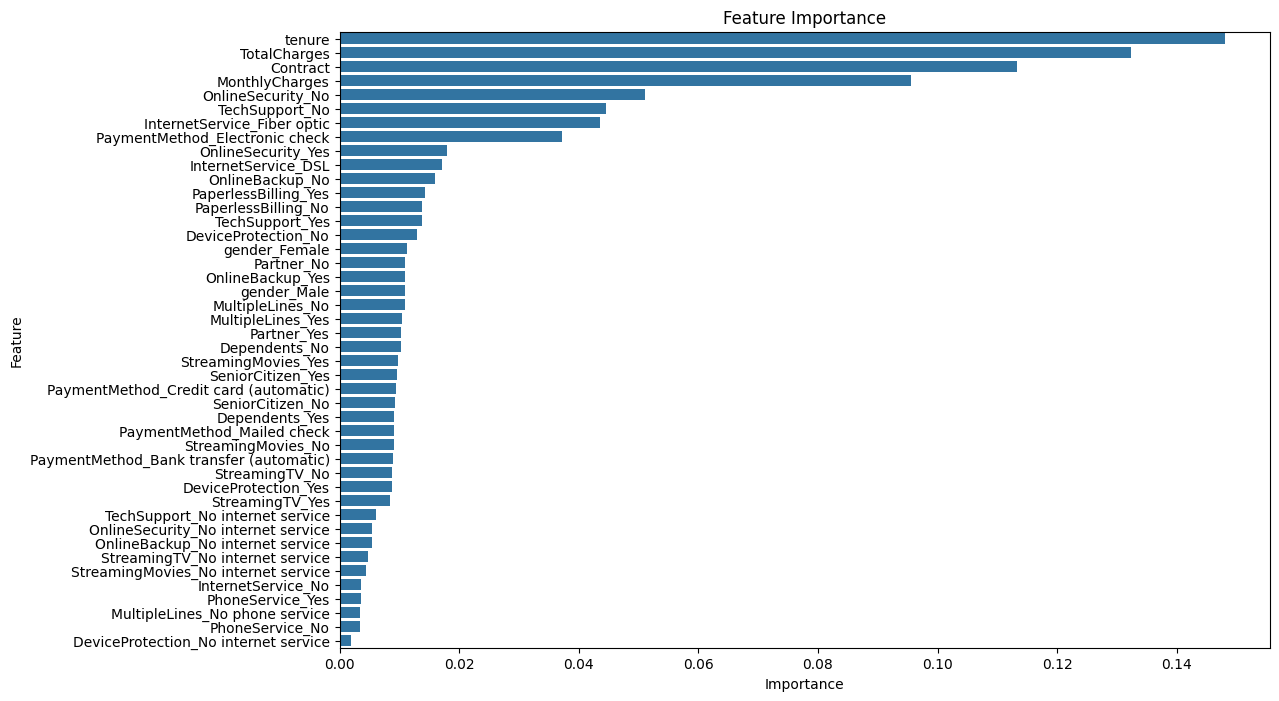

In [ ]:
#create feature importance
feature_importances = tuned_rf_model.feature_importances_

# Create a pandas Series with feature names and importances
importance_df = pd.Series(feature_importances, index=X_processed.columns).sort_values(ascending=False)

#plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df, y=importance_df.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Sebelum SMOTE: {0: 5174, 1: 1869}
Sesudah SMOTE: {0: 5174, 1: 5174}

Best parameters found:  {'max_depth': None, 'n_estimators': 100}

Model Evaluation:
Accuracy: 0.863768115942029

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1021
           1       0.86      0.87      0.87      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


Confusion Matrix:
 [[875 146]
 [136 913]]
ROC-AUC: 0.9323421681392379


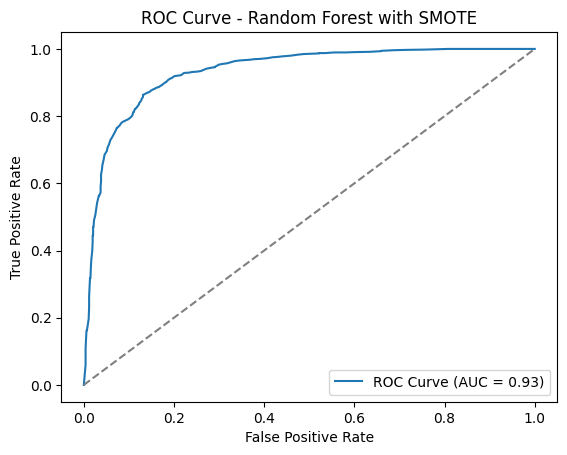

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd

# Pisahkan fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identifikasi kolom kategorikal & numerik
categorical_cols = X.select_dtypes(include=['category', 'object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns


# MinMaxScaler untuk numerik
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols, index=X.index)

# Gabungkan hasil scaling
X_processed = pd.concat([scaled_df, X[categorical_cols]], axis=1)

# Terapkan SMOTE sebelum split (pada data keseluruhan)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("Sebelum SMOTE:", y.value_counts().to_dict())
print("Sesudah SMOTE:", y_resampled.value_counts().to_dict())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Hyperparameter tuning RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2)
grid_search.fit(X_train, y_train)

print("\nBest parameters found: ", grid_search.best_params_)

# Model terbaik
tuned_rf_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    random_state=42
)

# Latih ulang dengan data train
tuned_rf_model.fit(X_train, y_train)

# Evaluasi model
y_pred = tuned_rf_model.predict(X_test)
y_prob = tuned_rf_model.predict_proba(X_test)[:, 1]

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest with SMOTE")
plt.legend()
plt.show()


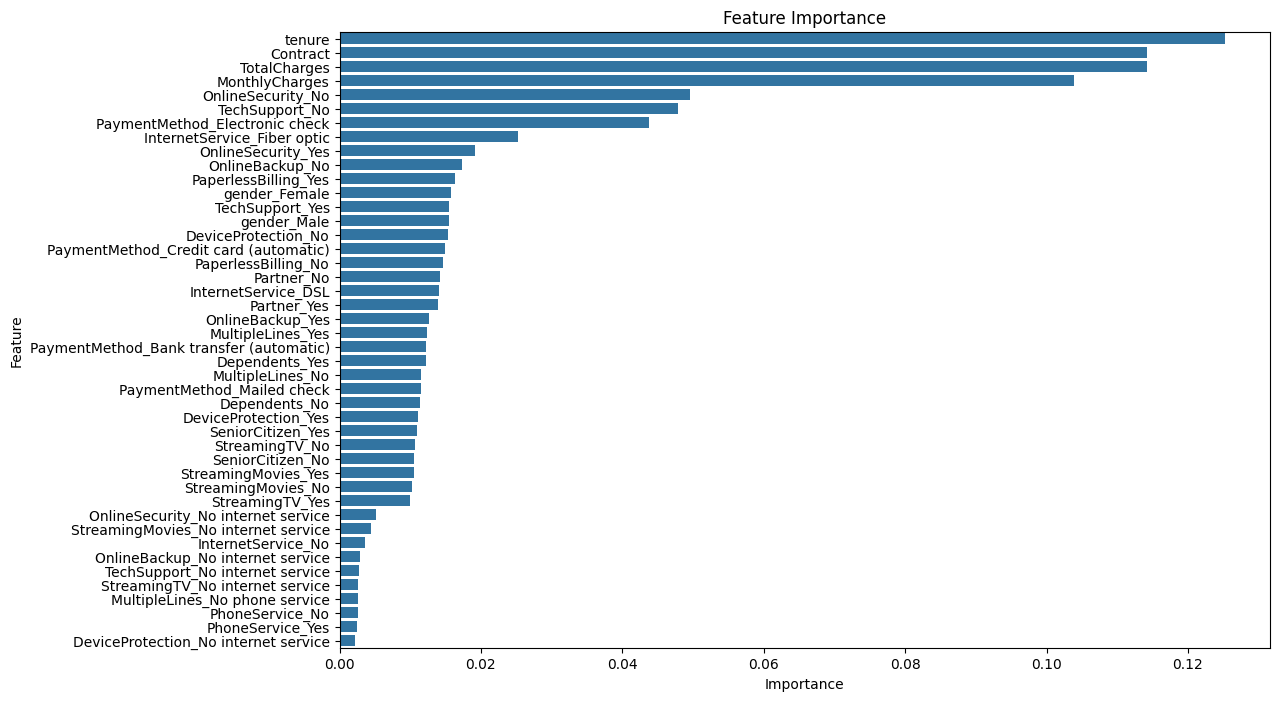

In [ ]:
# Feature importance
feature_importances = tuned_rf_model.feature_importances_

# Create a pandas Series with feature names and importances
importance_df = pd.Series(feature_importances, index=X_processed.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df, y=importance_df.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Load the original dataset again to start fresh for the new version
df_original_v5 = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

# Data Preprocessing (same as before)
df_original_v5['TotalCharges'] = pd.to_numeric(df_original_v5['TotalCharges'], errors='coerce')
df_original_v5['TotalCharges'] = df_original_v5['TotalCharges'].fillna(df_original_v5['TotalCharges'].mean())
df_original_v5.drop('customerID', axis=1, inplace=True)

# Separate features (X) and target (y) for the new version
X_original_v5 = df_original_v5.drop('Churn', axis=1)
y_original_v5 = df_original_v5['Churn']

# Binary encode 'Churn'
y_original_v5 = y_original_v5.map({'No': 0, 'Yes': 1})


one_hot_cols_multi_v5 = [col for col in X_original_v5.columns if X_original_v5[col].dtype == 'object' and len(X_original_v5[col].unique()) > 2 and col != 'Contract']
label_encoding_cols_v5 = ['Contract']
one_hot_cols_binary_v5 = [col for col in X_original_v5.columns if X_original_v5[col].dtype == 'object' and len(X_original_v5[col].unique()) == 2]

X_encoded_v5 = pd.get_dummies(X_original_v5, columns=one_hot_cols_multi_v5, drop_first=False)

from sklearn.preprocessing import LabelEncoder
le_v5 = LabelEncoder()
X_encoded_v5['Contract'] = le_v5.fit_transform(X_encoded_v5['Contract'])

X_encoded_v5 = pd.get_dummies(X_encoded_v5, columns=one_hot_cols_binary_v5, drop_first=False)

for col in X_encoded_v5.columns:
    if X_encoded_v5[col].dtype == 'bool':
        X_encoded_v5[col] = X_encoded_v5[col].astype(int)

# Identify numerical columns for scaling
numeric_cols_v5 = X_encoded_v5.select_dtypes(include=['int64', 'float64']).columns

# MinMaxScaler for numerical columns
scaler_v5 = MinMaxScaler()
X_scaled_v5 = scaler_v5.fit_transform(X_encoded_v5[numeric_cols_v5])
X_processed_v5 = pd.DataFrame(X_scaled_v5, columns=numeric_cols_v5, index=X_encoded_v5.index)

# Combine scaled numerical and encoded categorical features
# (Categorical features are already part of X_encoded_v5, so we just need to make sure the scaled numerical replace the original numerical)
for col in numeric_cols_v5:
    X_encoded_v5[col] = X_processed_v5[col]


# Apply SMOTEENN to the processed data
from imblearn.combine import SMOTEENN
smote_enn_v5 = SMOTEENN(random_state=42)
X_resampled_v5, y_resampled_v5 = smote_enn_v5.fit_resample(X_encoded_v5, y_original_v5)

print("Before SMOTEENN (New Version):", y_original_v5.value_counts().to_dict())
print("After SMOTEENN (New Version):", y_resampled_v5.value_counts().to_dict())

# Split data for the new version
X_train_v5, X_test_v5, y_train_v5, y_test_v5 = train_test_split(
    X_resampled_v5, y_resampled_v5, test_size=0.2, random_state=42
)

# Hyperparameter tuning RandomForest for the new version
param_grid_v5 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
rf_v5 = RandomForestClassifier(random_state=42)
grid_search_v5 = GridSearchCV(estimator=rf_v5, param_grid=param_grid_v5, cv=2)
grid_search_v5.fit(X_train_v5, y_train_v5)

print("\nBest parameters found (New Version - Random Forest with SMOTEENN + Previous Encoding): ", grid_search_v5.best_params_)

# Best model for the new version
tuned_rf_model_v5 = RandomForestClassifier(
    n_estimators=grid_search_v5.best_params_['n_estimators'],
    max_depth=grid_search_v5.best_params_['max_depth'],
    random_state=42
)

# Retrain with train data for the new version
tuned_rf_model_v5.fit(X_train_v5, y_train_v5)

Before SMOTEENN (New Version): {0: 5174, 1: 1869}
After SMOTEENN (New Version): {1: 3329, 0: 2777}

Best parameters found (New Version - Random Forest with SMOTEENN + Previous Encoding):  {'max_depth': None, 'n_estimators': 200}


RandomForestClassifier(n_estimators=200, random_state=42)


Model Evaluation (Version 5 - Random Forest with SMOTEENN + Previous Encoding):
Accuracy: 0.9582651391162029

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       584
           1       0.95      0.97      0.96       638

    accuracy                           0.96      1222
   macro avg       0.96      0.96      0.96      1222
weighted avg       0.96      0.96      0.96      1222


Confusion Matrix:
 [[553  31]
 [ 20 618]]
ROC-AUC: 0.9934445720788422


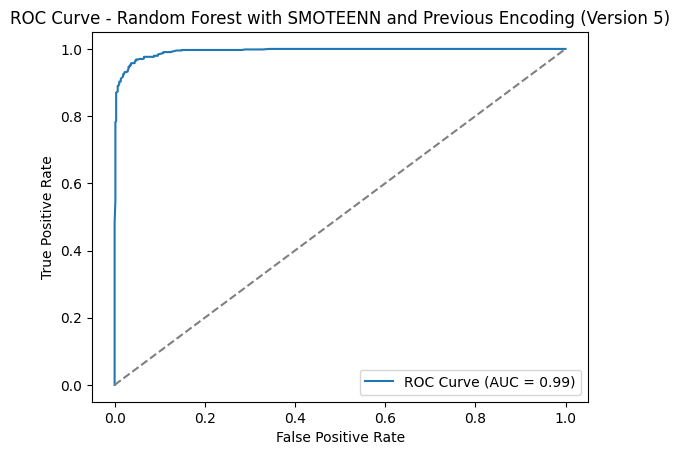

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate the Random Forest model for Version 5
y_pred_v5 = tuned_rf_model_v5.predict(X_test_v5)
y_prob_v5 = tuned_rf_model_v5.predict_proba(X_test_v5)[:, 1]

print("\nModel Evaluation (Version 5 - Random Forest with SMOTEENN + Previous Encoding):")
print("Accuracy:", accuracy_score(y_test_v5, y_pred_v5))
print("\nClassification Report:\n", classification_report(y_test_v5, y_pred_v5))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_v5, y_pred_v5))
print("ROC-AUC:", roc_auc_score(y_test_v5, y_prob_v5))

# Plot ROC Curve
fpr_v5, tpr_v5, thresholds_v5 = roc_curve(y_test_v5, y_prob_v5)
plt.plot(fpr_v5, tpr_v5, label=f"ROC Curve (AUC = {roc_auc_score(y_test_v5, y_prob_v5):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest with SMOTEENN and Previous Encoding (Version 5)")
plt.legend()
plt.show()

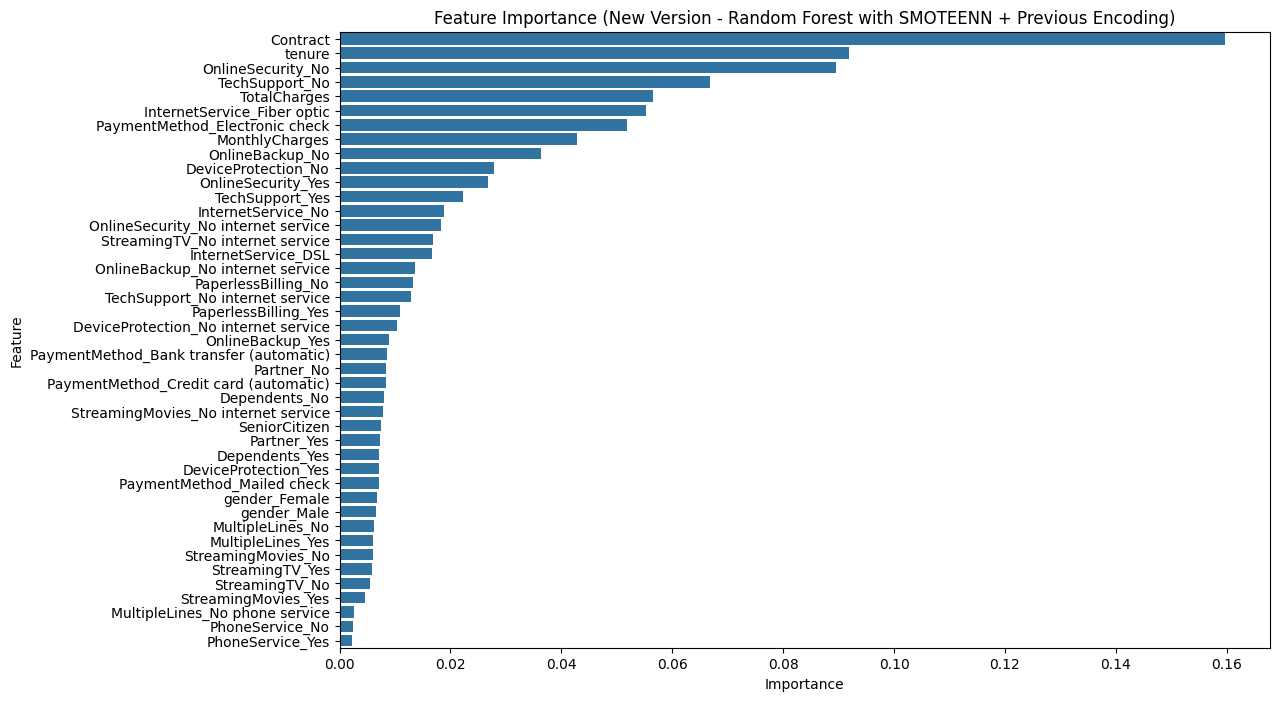

In [ ]:
# Feature importance for the new version
feature_importances_v5 = tuned_rf_model_v5.feature_importances_

# Create a pandas Series with feature names and importances
importance_df_v5 = pd.Series(feature_importances_v5, index=X_resampled_v5.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df_v5, y=importance_df_v5.index)
plt.title('Feature Importance (New Version - Random Forest with SMOTEENN + Previous Encoding)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

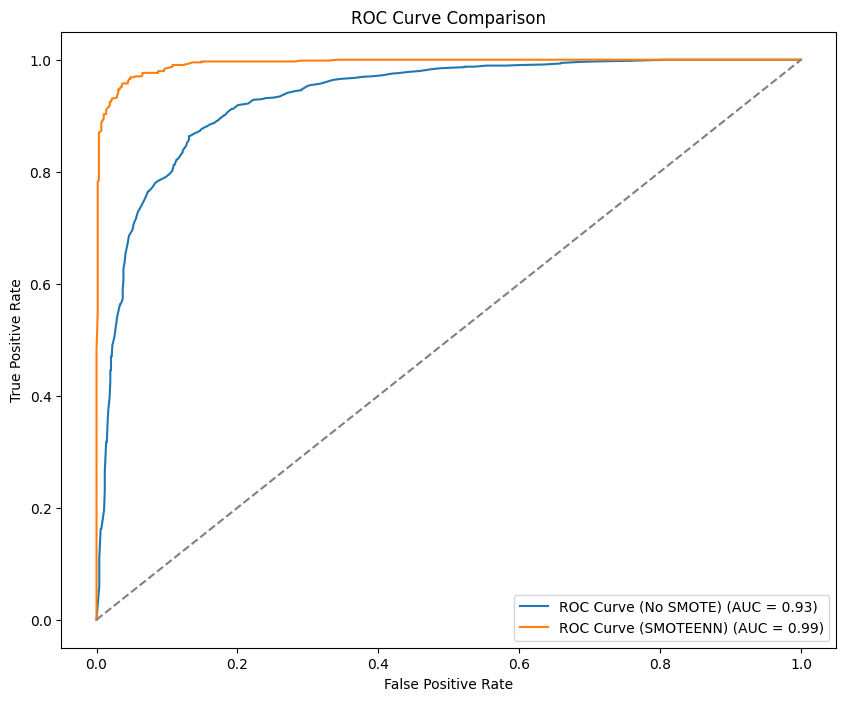

In [ ]:
# Re-calculate ROC curve for the first model (without SMOTE)
# Need to use the original test data X_test and y_test from the first model training
# Assuming X_test and y_test from the first model are still available, if not, re-split the data.
# For this to work correctly, ensure the original X_test and y_test correspond to the model without SMOTE.
# Based on the notebook state, the first model used X_test and y_test from the split of X_processed and y
# before SMOTE was applied.

# Re-calculate ROC for the first model (without SMOTE)
y_prob_no_smote = tuned_rf_model.predict_proba(X_test)[:, 1]
fpr_no_smote, tpr_no_smote, thresholds_no_smote = roc_curve(y_test, y_prob_no_smote)
auc_no_smote = roc_auc_score(y_test, y_prob_no_smote)

# ROC curve for the second model (with SMOTE)
# X_test, y_test from the second model training (after SMOTE) are used
# These correspond to X_test_v5, y_test_v5 from the notebook state

y_prob_smote = tuned_rf_model_v5.predict_proba(X_test_v5)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test_v5, y_prob_smote)
auc_smote = roc_auc_score(y_test_v5, y_prob_smote)

# Assuming a third model version needs to be added to the comparison.
# Based on the notebook state, there are two versions: one without SMOTE and one with SMOTEENN.
# It seems the user wants to compare these two and potentially a third one.
# As there is no third model trained in the provided notebook state, I will plot the two available models.
# If you intended a third model, please provide the code for it.

plt.figure(figsize=(10, 8))
plt.plot(fpr_no_smote, tpr_no_smote, label=f"ROC Curve (No SMOTE) (AUC = {auc_no_smote:.2f})")
plt.plot(fpr_smote, tpr_smote, label=f"ROC Curve (SMOTEENN) (AUC = {auc_smote:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [ ]:
import pickle
import os

# Create model directory if it doesn't exist
model_dir = os.path.join(os.path.dirname(os.getcwd()), 'model')
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, 'random_forest_model.pkl')
with open(model_path, 'wb') as f:
    pickle.dump(tuned_rf_model_v5, f)

# Save the scaler
scaler_path = os.path.join(model_dir, 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler_v5, f)

# Save the label encoder
label_encoder_path = os.path.join(model_dir, 'label_encoder.pkl')
with open(label_encoder_path, 'wb') as f:
    pickle.dump(le_v5, f)

# Save feature columns (important for maintaining column order)
feature_columns_path = os.path.join(model_dir, 'feature_columns.pkl')
with open(feature_columns_path, 'wb') as f:
    pickle.dump(list(X_encoded_v5.columns), f)

# Save encoding information
encoding_info = {
    'one_hot_cols_multi': one_hot_cols_multi_v5,
    'label_encoding_cols': label_encoding_cols_v5,
    'one_hot_cols_binary': one_hot_cols_binary_v5,
    'numeric_cols': list(numeric_cols_v5)
}
encoding_info_path = os.path.join(model_dir, 'encoding_info.pkl')
with open(encoding_info_path, 'wb') as f:
    pickle.dump(encoding_info, f)

print(f"Model saved successfully to: {model_path}")
print(f"Scaler saved to: {scaler_path}")
print(f"Label encoder saved to: {label_encoder_path}")
print(f"Feature columns saved to: {feature_columns_path}")
print(f"Encoding info saved to: {encoding_info_path}")
print(f"\nTotal features in model: {len(X_encoded_v5.columns)}")
print(f"Feature columns: {list(X_encoded_v5.columns)}")